# Demo of a KDE plot beside timeseries set

In [1]:
%pylab inline
#%matplotlib inline
#import matplotlib.pyplot as plt
import mpld3
#mpld3.enable_notebook()
#%matplotlib notebook
#
import pysd
import numpy as np
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


NameError: name 'state' is not defined

### Load the model using PySD
The model is a basic, 1-stock carbon bathtub model

In [2]:
model = pysd.read_vensim('../../models/Climate/Atmospheric_Bathtub.mdl')
print model.doc()

|    | name                      | modelName                 | unit        | comment                                    |
|----+---------------------------+---------------------------+-------------+--------------------------------------------|
|  0 | Emissions                 | emissions                 |             | nan                                        |
|  1 | Excess Atmospheric Carbon | excess_atmospheric_carbon |             | nan                                        |
|  2 | FINAL TIME                | final_time                | Month       | The final time for the simulation.         |
|  3 | INITIAL TIME              | initial_time              | Month       | The initial time for the simulation.       |
|  4 | Natural Removal           | natural_removal           |             | nan                                        |
|  5 | Removal Constant          | removal_constant          |             | nan                                        |
|  6 | SAVEPER          

### Generate a set of parameters to use as input
Here, drawing 1000 constant values for the `Emissions` parameter from an exponential distribution

In [3]:
n_runs = 1000
runs = pd.DataFrame({'Emissions': np.random.exponential(scale=10000, size=n_runs)})
runs.head()

,Emissions
0,2862.573249
1,23208.933671
2,30256.409702
3,10339.757007
4,2843.203204


### Run the model with the various parameters

In [4]:
result = runs.apply(lambda p: model.run(params=dict(p))['Excess Atmospheric Carbon'],
                    axis=1).T
result.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,2862.573249,23208.933671,30256.409702,10339.757007,2843.203204,5347.545999,47284.180637,10923.619315,5636.865090,22313.016387,...,4371.735736,7190.321753,1640.460139,19084.475809,6220.337224,7377.659406,770.703843,18197.870295,17326.924760,4827.955762
2.0,5696.520766,46185.778005,60210.255307,20576.116444,5657.974376,10641.616537,94095.519468,21738.002436,11217.361530,44402.902611,...,8699.754114,14308.740289,3264.515676,37978.106859,12378.471076,14681.542218,1533.700647,36213.761886,34480.580271,9607.631966
3.0,8502.128807,68932.853896,89864.562456,30710.112286,8444.597837,15882.746370,140438.744910,32444.241727,16742.053004,66271.889972,...,12984.492309,21355.974640,4872.330659,56682.801600,18475.023589,21912.386202,2289.067483,54049.494562,51462.699228,14339.511408
4.0,11279.680768,91452.459027,119222.326534,40742.768171,11203.355062,21071.464905,186318.538098,43043.418625,22211.497565,87922.187460,...,17226.383122,28332.736647,6464.067491,75200.449392,24510.610577,29070.921746,3036.880651,71706.869911,68274.996996,19024.072056


### Draw a static plot showing the results, and a marginal density plot
This would be for making graphics for a publication, where you don't want an interactive view, but you want fine control over what the figure looks like.

This is relatively simple, because we rely on the plotting library `seaborn` to generate the KDE plot, instead of working out the densities ourselves.

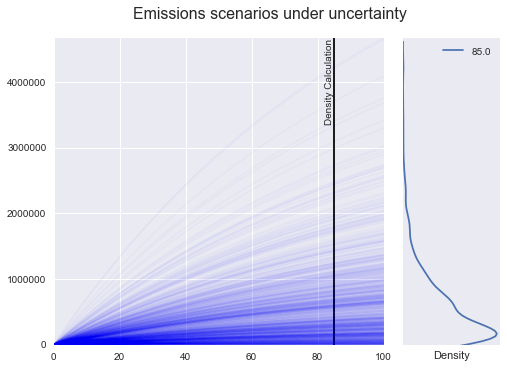

In [6]:
import matplotlib.pylab as plt
# define when to show the density
density_time = 85

# left side: plot all traces, slightly transparent
plt.subplot2grid((1,4), loc=(0,0), colspan=3)
[plt.plot(result.index, result[i], 'b', alpha=.02) for i in result.columns]
ymax = result.max().max()
plt.ylim(0, ymax)

# left side: add marker of density location
plt.vlines(density_time, 0, ymax, 'k')
plt.text(density_time, ymax, 'Density Calculation', ha='right', va='top', rotation=90)

# right side: gaussian KDE on selected timestamp
plt.subplot2grid((1,4), loc=(0,3))
seaborn.kdeplot(result.loc[density_time], vertical=True)
plt.ylim(0, ymax)
plt.yticks([])
plt.xticks([])
plt.xlabel('Density')

plt.suptitle('Emissions scenarios under uncertainty', fontsize=16);

### Interactive plot using python backend
The following would be for lightweight exploration 

In [7]:
import matplotlib as mpl
from ipywidgets import interact, IntSlider
sim_time = 200
slider_time = IntSlider(description = 'Select Time for plotting Density',
                        min=0, max=result.index[-1], value=1)

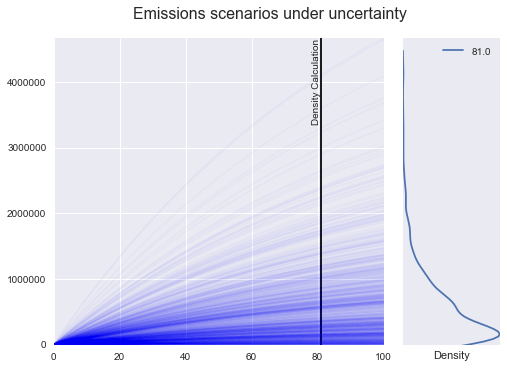

In [10]:
@interact(density_time=slider_time)
def update(density_time): 
    ax1 = plt.subplot2grid((1,4), loc=(0,0), colspan=3)
    [ax1.plot(result.index, result[i], 'b', alpha=.02) for i in result.columns]
    ymax = result.max().max()
    ax1.set_ylim(0, ymax)

    # left side: add marker of density location
    ax1.vlines(density_time, 0, ymax, 'k')
    ax1.text(density_time, ymax, 'Density Calculation', ha='right', va='top', rotation=90)

    # right side: gaussian KDE on selected timestamp
    ax2 = plt.subplot2grid((1,4), loc=(0,3))
    seaborn.kdeplot(result.loc[density_time], vertical=True, ax=ax2)
    ax2.set_ylim(0, ymax)
    ax2.set_yticks([])
    ax2.set_xticks([])
    ax2.set_xlabel('Density')

    plt.suptitle('Emissions scenarios under uncertainty', fontsize=16);
    

### Interactive figure with javascript background
This script would prepare interactive graphics to share on a webpage, independent of the python backend. 

In [11]:
import mpld3

/Users/houghton/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/houghton/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


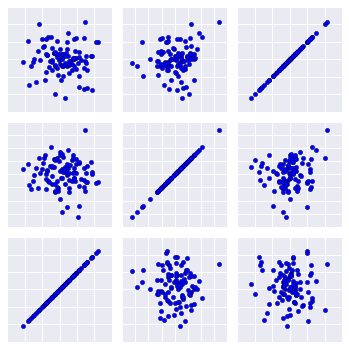

In [2]:
from mpld3 import plugins

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax[::-1]

X = np.random.normal(size=(3, 100))
for i in range(3):
    for j in range(3):
        ax[i, j].xaxis.set_major_formatter(plt.NullFormatter())
        ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
        points = ax[i, j].scatter(X[j], X[i])
        
plugins.connect(fig, plugins.LinkedBrush(points))